## EDA: Incidencia de Covid19 por estado en Estados Unidos (2020 - 2021)

### Importación de librerías y petición a la API para obtener el dataset

In [153]:
#importamos las librerías necesarias
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
#hacemos la petición a la API con la librería requests para solicitar y guardar los datos
url = "https://api.covidtracking.com/v1/states/daily.json"
response = requests.get(url)
if response.status_code != 200:
    print("error")
data = response.json()
df = pd.DataFrame(data)

In [155]:
#mostramos las primeras 5 líneas del dataframe
#para verificar que se ha importado correctamente
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


### Exploración básica inicial

In [156]:
#verificamos el tamaño del dataframe
df.shape

(20780, 56)

El dataframe tiene 20780 filas (observaciones) y 56 columnas (variables).

In [157]:
#ejecutamos el método .info para tener una visión general de las columnas, los datos no nulos y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

Vemos que hay algunas variables que tienen muy pocos datos no-nulos como por ejemplo "positiveTestsPeopleAntigen" que sólo tiene 633 datos de 20780 que podría tener.

In [158]:
#contamos la cantidad de variables de cada tipo
df.dtypes.value_counts()

float64    33
int64      13
object     10
dtype: int64

Según los tipos de dato del dataframe, vemos que hay 46 variables numéricas y 10 categóricas.

### Análisis de Nulos

In [159]:
#este método devuelve True si hay nulos en la columna
#y devuelve False si no los hay
df.isnull().any()

date                           False
state                          False
positive                        True
probableCases                   True
negative                        True
pending                         True
totalTestResultsSource         False
totalTestResults                True
hospitalizedCurrently           True
hospitalizedCumulative          True
inIcuCurrently                  True
inIcuCumulative                 True
onVentilatorCurrently           True
onVentilatorCumulative          True
recovered                       True
lastUpdateEt                    True
dateModified                    True
checkTimeEt                     True
death                           True
hospitalized                    True
hospitalizedDischarged          True
dateChecked                     True
totalTestsViral                 True
positiveTestsViral              True
negativeTestsViral              True
positiveCasesViral              True
deathConfirmed                  True
d

Vemos que hay bastantes columnas que contienen nulos. Procedemos a cuantificarlos con la siguiente línea de código:

In [250]:
#cuantificamos la cantidad de datos nulos por cada columna (axis=0 indica que la suma debe realizarse a lo largo del eje vertical, es decir por columnas)
df.isnull().sum(axis = 0)

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

Aunque tenemos un valor numérico de nulos que nos da cierta información, será mucho más interesante calcular la proporción de nulos respecto al total de datos y representarlo graficamente:

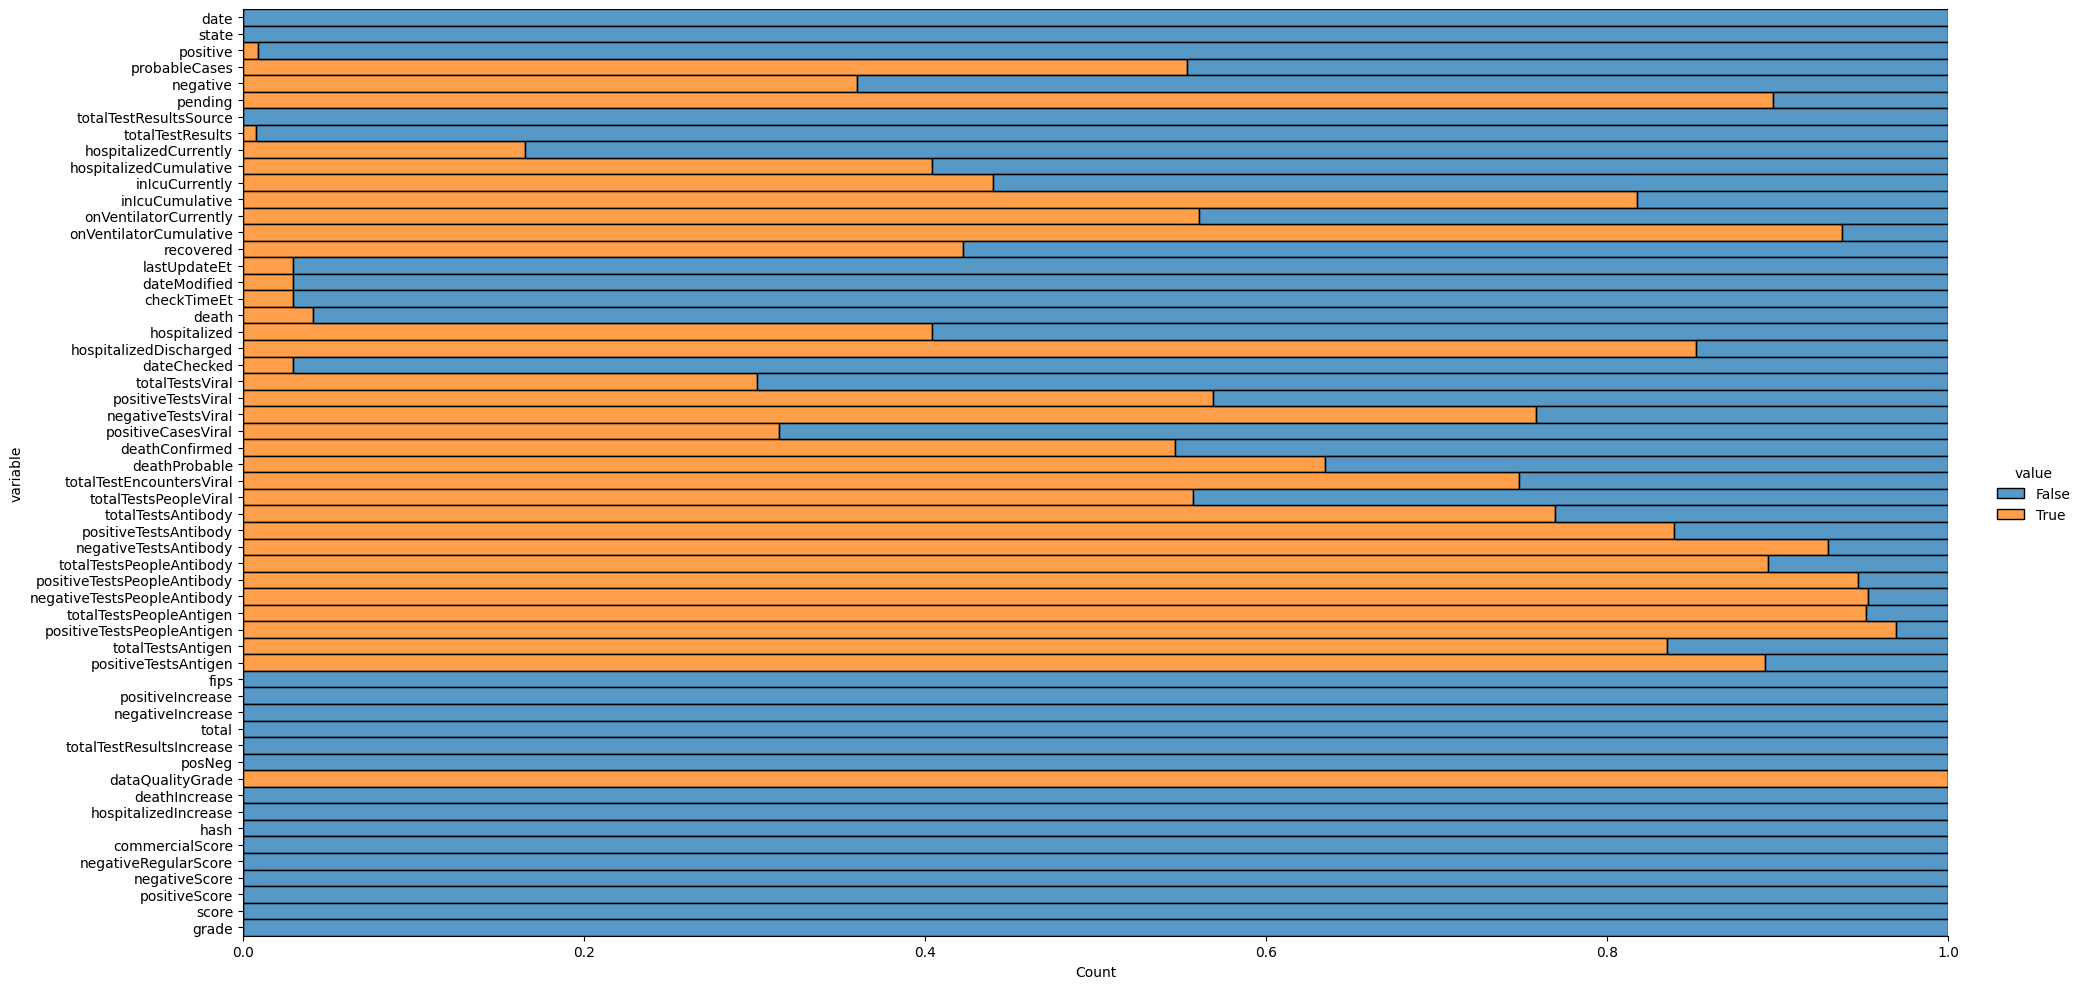

In [252]:
#determinamos la proporción de nulos por variable
#True (naranja): nulo
#False (azul): no-nulo
df.isnull().melt().pipe(lambda df:(sns.displot(data=df, y="variable", 
                                               hue="value", multiple="fill", height=10, aspect=2)))

Vemos que las columnas relacionadas con los tests (tanto Antibody como Antigen) tienen un porcentaje de nulos bastante alto (casi del 80%). Muy posiblemente convenga eliminar estas columnas del dataframe para nuestro análisis. Las columnas "pending", "onVentilatorCumulative", "hospitalizedDischarged", "negativeTestViral", "dataQualityGrade", entre otras, también tienen un porcentaje cercano o superior al 80% de nulos.

In [162]:
#¿qué pasaría si descartamos los nulos?
df.dropna().shape

(0, 56)

Vemos que no podemos descartar los registros que contengan nulos en el dataframe original porque nos quedaríamos sin datos. Será más conveniente eliminar las columnas que tengan un porcentaje de nulos superior al 80% y quedarnos sólo con algunas variables más interesantes.

### Limpieza de datos

Definimos las variables categóricas y numéricas más interesantes para el análisis que queremos realizar:

In [163]:
#determinamos las variables categóricas y numéricas de interés (reducimos la lista para hacer más sencillo el análisis)
categoricas = ["date", "state"]
numericas = ["positive", "totalTestResults", "death", "positiveIncrease", 
             "negativeIncrease", "totalTestResultsIncrease", "deathIncrease", 
             "hospitalizedIncrease"]

In [164]:
df[categoricas].head()

,date,state
0,20210307,AK
1,20210307,AL
2,20210307,AR
3,20210307,AS
4,20210307,AZ


In [165]:
df[numericas].head()

,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,56886.0,1731628.0,305.0,0,0,0,0,0
1,499819.0,2323788.0,10148.0,408,2087,2347,-1,0
2,324818.0,2736442.0,5319.0,165,3267,3380,22,11
3,0.0,2140.0,0.0,0,0,0,0,0
4,826454.0,7908105.0,16328.0,1335,13678,45110,5,44


In [166]:
#filtramos el dataset original para que incluya únicamente las variables de interés y sea más simple
df_simple = df.loc[:, categoricas + numericas]
df_simple.head()

,date,state,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,20210307,AK,56886.0,1731628.0,305.0,0,0,0,0,0
1,20210307,AL,499819.0,2323788.0,10148.0,408,2087,2347,-1,0
2,20210307,AR,324818.0,2736442.0,5319.0,165,3267,3380,22,11
3,20210307,AS,0.0,2140.0,0.0,0,0,0,0,0
4,20210307,AZ,826454.0,7908105.0,16328.0,1335,13678,45110,5,44


In [167]:
#eliminamos los registros que contengan nulos y comprobamos el tamaño del nuevo dataframe
df_cleaned = df_simple.dropna()
df_cleaned.shape

(19858, 10)

In [168]:
#verificamos si hay duplicados y los eliminamos en caso de que hayan
df_cleaned = df_cleaned.drop_duplicates(keep="last")
df_cleaned.shape

(19858, 10)

El nuevo dataframe **limpio** contiene casi el mismo número de filas, pero hemos reducido el número de columnas a 10 para simplificar el análisis.

### Comprobación de la limpieza de datos con un mapa de calor > en blanco valores nulos del dataframe

#### EL ANTES: dataset original 

<AxesSubplot:>

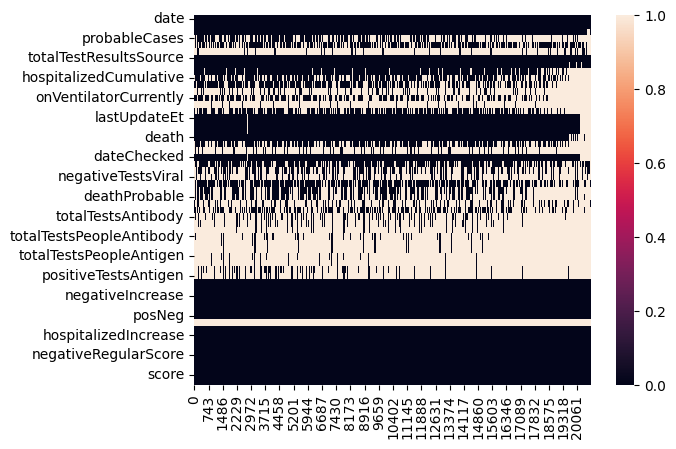

In [169]:
#graficamos los valores nulos y no-nulos con un gráfico de calor del dataset ORIGINAL
#en blanco observamos los valores nulos y en negro los no nulos
df.isnull().transpose().pipe(lambda df: sns.heatmap(data=df, vmin=0, vmax=1))

#### EL DESPUÉS: dataset limpio

<AxesSubplot:>

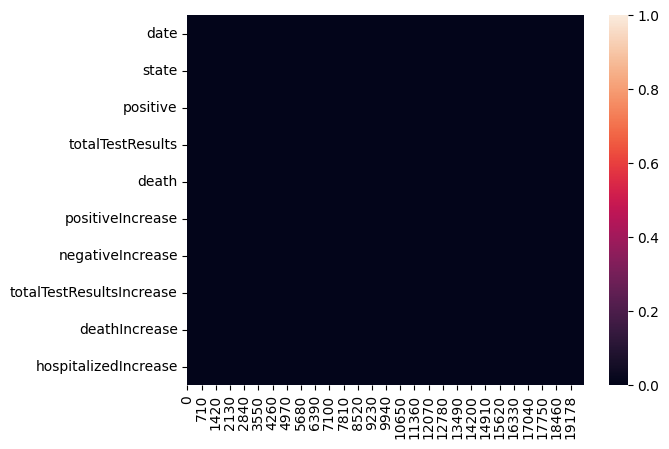

In [170]:
#graficamos nuevamente pero esta vez usando el dataframe limpio
df_cleaned.isnull().transpose().pipe(lambda df_cleaned: sns.heatmap(data=df_cleaned, vmin=0, vmax=1))

Podemos ver que no hay datos nulos después de la eliminación de las columnas y de usar el método dropna(). Guardamos el dataset limpio en una nueva variable llamada df_cleaned. Todo el gráfico es de color negro (0.0) e indica que todas las columnas tienen valores no nulos.

### Seguimos explorando los datos y limpiando

In [171]:
for col in categoricas:
    print(f"Column name: {col}")
    print(df_cleaned[col].value_counts())
    print()

Column name: date
20210307    56
20200728    56
20200720    56
20200721    56
20200722    56
            ..
20200301     1
20200229     1
20200228     1
20200227     1
20200226     1
Name: date, Length: 376, dtype: int64

Column name: state
WA    376
NV    368
NJ    368
MI    363
DE    362
FL    362
CA    361
ND    360
AZ    360
CO    360
GA    360
IN    359
MO    359
KY    359
KS    359
UT    358
VA    358
NY    358
WV    358
LA    358
AL    358
SC    357
NC    356
IL    356
AK    356
TX    356
SD    355
MP    355
PA    355
MA    355
DC    354
NE    354
OK    354
CT    354
WI    353
VT    353
OH    353
MS    353
MN    352
AR    351
GU    351
PR    351
ID    351
NH    350
NM    349
TN    349
MD    349
IA    348
ME    346
WY    346
MT    345
RI    344
OR    343
AS    342
HI    341
VI    337
Name: state, dtype: int64



In [253]:
#cambiamos el tipo de dato de las fechas para trabajar con este campo más adelante
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"], format="%Y%m%d")
df_cleaned.sort_values(by="date", ascending=False, inplace=True)

#cambiamos las columnas positive, death y totalTestResults a un tipo de dato entero (que creemos tiene más sentido)
df_cleaned["positive"] = df_cleaned["positive"].astype("int64")
df_cleaned["death"] = df_cleaned["death"].astype("int64")
df_cleaned["totalTestResults"] = df_cleaned["totalTestResults"].astype("int64")
df_cleaned.head()

,date,state,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,2021-03-07,AK,56886,1731628,305,0,0,0,0,0
28,2021-03-07,MS,297581,1756955,6808,260,0,260,3,0
27,2021-03-07,MP,145,17574,2,1,0,1,0,0
3,2021-03-07,AS,0,2140,0,0,0,0,0,0
4,2021-03-07,AZ,826454,7908105,16328,1335,13678,45110,5,44


In [254]:
#realizamos un chequeo para verificar los tipos de datos después de "homogenizarlos"
df_cleaned.dtypes.value_counts()

int64             8
datetime64[ns]    1
object            1
dtype: int64

In [256]:
df_cleaned[numericas].describe()

,positive,totalTestResults,death,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
count,1.985800e+04,1.985800e+04,19858.000000,19858.000000,19858.000000,19858.000000,19858.00000,19858.000000
mean,1.712594e+05,2.270170e+06,3695.562745,1447.835482,3753.448232,18317.123477,25.94078,39.086565
std,3.311961e+05,4.499228e+06,6288.825065,3078.001660,11817.112253,34141.629982,61.30094,212.858625
min,0.000000e+00,0.000000e+00,0.000000,-7757.000000,-968686.000000,-130545.000000,-201.00000,-12257.000000
25%,7.482500e+03,1.401315e+05,167.000000,94.000000,0.000000,1655.000000,1.00000,0.000000
50%,5.131850e+04,7.222520e+05,1119.000000,487.000000,308.000000,6733.500000,7.00000,1.000000
75%,1.862452e+05,2.379632e+06,4405.500000,1421.000000,4271.750000,20107.000000,25.00000,40.000000
max,3.501394e+06,4.964601e+07,54124.000000,71734.000000,212974.000000,473076.000000,2559.00000,16373.000000


Tomando TODO el dataframe limpio, es decir, todos los estados de Estados Unidos, sus 10 variables (columnas) en todas las fechas de toma de datos, vemos que es complicado sacar conclusiones de algun tipo. Será mucho más conveniente analizar los datos por partes, realizando agrupaciones y utilizando gráficos.

### Evolución de casos positivos en el tiempo (positivos vs. fechas)

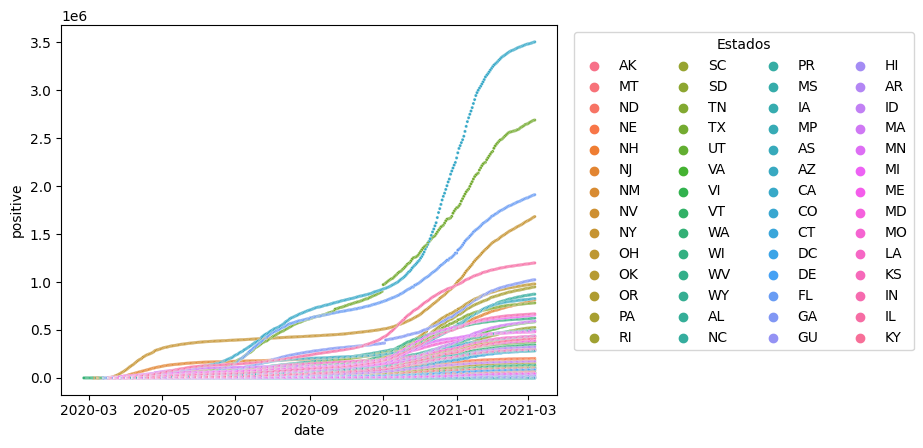

In [206]:
#graficamos en un scatterplot los casos positivos por fecha. En cada color tenemos a un estado
sns.scatterplot(data=df_cleaned, x="date", y="positive", s=5, hue="state")
plt.legend(title='Estados', loc='best', ncol=4, bbox_to_anchor=(1.02, 1))

Vemos que las gráficas de los estados tienen una forma similar (aumentan con el tiempo). Sería interesante (en un análisis futuro) normalizar las gráficas para hacer una comparativa más acertada entre estados. Es decir, en lugar de utilizar los casos positivos como valor absoluto, podríamos usar la cantidad de casos positivos por cada millón de habitantes. Así podríamos comparar mejor entre estados.

Podemos observar que California (CA) es uno de los estados con mayor cantidad de casos.

### Evolución de muertes en el tiempo (muertes vs. fechas)

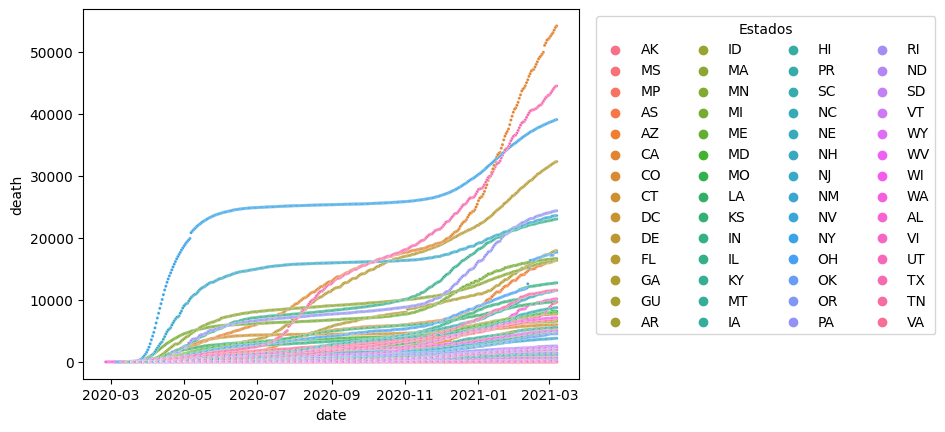

In [257]:
#graficamos en un scatterplot las muertes por fecha. En cada color tenemos a un estado
sns.scatterplot(data=df_cleaned, x="date", y="death", s=5, hue="state")
plt.legend(title='Estados', loc='best', ncol=4, bbox_to_anchor=(1.02, 1))

Para ver la información más claramente nos podemos centrar en algunos estados y ver si es posible sacar algunas conclusiones. Analizaremos a California, Nueva York y Washington:

### CALIFORNIA

In [258]:
#filtramos por el estado de interés
df_california = df_cleaned.loc[df_cleaned["state"] == "CA"]
df_california[["state", "date", "positive", "death"]].head()

,state,date,positive,death
5,CA,2021-03-07,3501394,54124
61,CA,2021-03-06,3497578,53866
117,CA,2021-03-05,3493126,53448
173,CA,2021-03-04,3488467,53048
229,CA,2021-03-03,3484963,52775


Sería interesante ver el porcentaje de muertes respecto al número de casos positivos y cómo avanza este porcentaje en el tiempo en el estado de California. Para ello creamos una nueva variable (columna) que nos permita relacionar los positivos con los muertos.

In [259]:
#creamos una nueva columna que nos permita ver el porcentaje de muertes respecto a los positivos
df_california["percentageDeath"] = (df_california["death"]*100)/df_california["positive"]
df_new_california = df_california[["state", "date", "positive", "death", "percentageDeath"]]
df_new_california.sort_values(by="percentageDeath", ascending=False, inplace=True)
df_new_california.head()

c:\users\ana milena gomez\documents\ana milena gomez\ia-school_factoria-f5\datathon-covid19\dataton\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ana milena gomez\documents\ana milena gomez\ia-school_factoria-f5\datathon-covid19\dataton\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,state,date,positive,death,percentageDeath
16525,CA,2020-05-16,76793,3204,4.172255
17309,CA,2020-05-02,52197,2171,4.159243
16917,CA,2020-05-09,64561,2678,4.148015
16581,CA,2020-05-15,74936,3108,4.147539
16637,CA,2020-05-14,73164,3032,4.144115


In [260]:
df_new_california.tail()

,state,date,positive,death,percentageDeath
3533,CA,2021-01-03,2391261,26538,1.109791
3365,CA,2021-01-06,2482226,27462,1.106346
3085,CA,2021-01-11,2710801,29965,1.105393
3421,CA,2021-01-05,2452334,27003,1.101114
3477,CA,2021-01-04,2420894,26635,1.100213


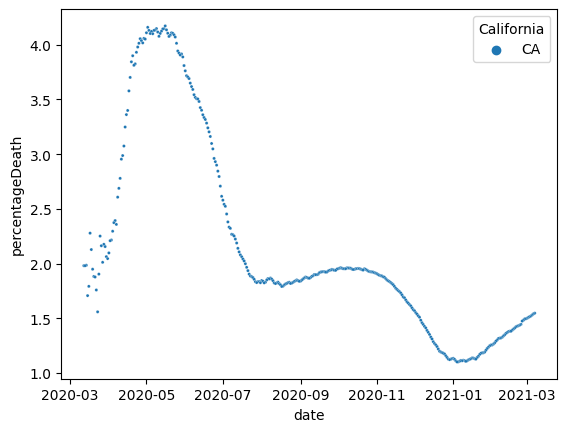

In [245]:
#graficamos como evoluciona el porcentaje de muertes respecto al tiempo
sns.scatterplot(data=df_new_california, x="date", y="percentageDeath", s=5, hue="state")
plt.legend(title='California', loc='best')

**Estos resultados son bien interesantes porque coinciden relativamente bien con las olas del Covid19:**

**Primera ola:** La primera ola de COVID-19 en Estados Unidos se produjo a principios de 2020, específicamente en marzo y abril. Durante este período, la pandemia se propagó rápidamente y muchos estados experimentaron aumentos significativos en los casos de COVID-19.

**Segunda ola:** Después de una disminución de casos en el verano de 2020, hubo un resurgimiento de casos en varios estados a fines del verano y principios del otoño, lo que se conoció como la segunda ola de COVID-19. Esta ola alcanzó su punto máximo en septiembre de 2020.

### NEW YORK

In [231]:
#filtramos por el estado de interés
df_newyork = df_cleaned.loc[df_cleaned["state"] == "NY"]
df_newyork[["state", "date", "positive", "death"]].head()

,state,date,positive,death
37,NY,2021-03-07,1681169,39029
93,NY,2021-03-06,1674380,38970
149,NY,2021-03-05,1666733,38891
205,NY,2021-03-04,1657777,38796
261,NY,2021-03-03,1650184,38735


In [238]:
#creamos una nueva columna que nos permita ver el porcentaje de muertes respecto a los positivos
df_newyork["percentageDeath"] = (df_newyork["death"]*100)/df_newyork["positive"]
df_new_newyork = df_newyork[["state", "date", "positive", "death", "percentageDeath"]]
df_new_newyork.sort_values(by="percentageDeath", ascending=False, inplace=True)
df_new_newyork.head()

c:\users\ana milena gomez\documents\ana milena gomez\ia-school_factoria-f5\datathon-covid19\dataton\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ana milena gomez\documents\ana milena gomez\ia-school_factoria-f5\datathon-covid19\dataton\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,state,date,positive,death,percentageDeath
16333,NY,2020-05-20,354370,22976,6.483619
15941,NY,2020-05-27,364965,23643,6.478155
15997,NY,2020-05-26,363836,23564,6.476544
16221,NY,2020-05-22,358154,23195,6.476264
16277,NY,2020-05-21,356458,23083,6.475658


In [234]:
df_new_newyork.tail()

,state,date,positive,death,percentageDeath
19861,NY,2020-03-18,2383,12,0.503567
19749,NY,2020-03-20,7102,35,0.492819
20026,NY,2020-03-15,648,3,0.462963
19693,NY,2020-03-21,10356,44,0.424874
19805,NY,2020-03-19,4152,12,0.289017


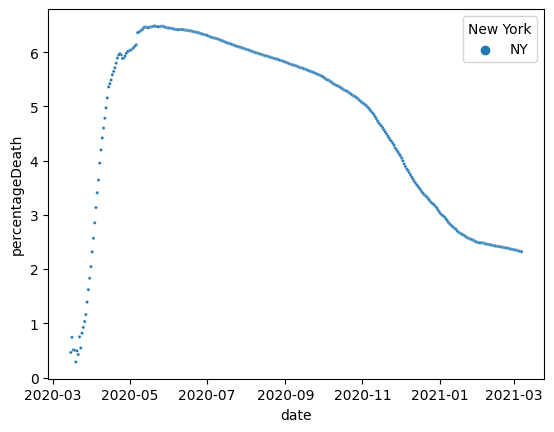

In [236]:
sns.scatterplot(data=df_new_newyork, x="date", y="percentageDeath", s=5, hue="state")
plt.legend(title='New York', loc='best')

Estos resultados son bien curiosos y diferentes al comportamiento en California. Parece que en Nueva York el porcentaje de muertes se mantuvo relativamente constante durante varios meses (desde mayo 2020 hasta noviembre 2020).

**Es importante anotar que la campaña de vacunación en Estados Unidos inició el 14 de diciembre de 2020, lo que puede explicar el descenso en el porcentaje de muertes en la última parte de la gráfica.**

### WASHINGTON

In [261]:
#filtramos por el estado de interés
df_washington = df_cleaned.loc[df_cleaned["state"] == "WA"]
df_washington[["state", "date", "positive", "death"]].head()

,state,date,positive,death
52,WA,2021-03-07,344532,5041
108,WA,2021-03-06,343868,5041
164,WA,2021-03-05,343090,5032
220,WA,2021-03-04,342236,5012
276,WA,2021-03-03,341441,4988


In [247]:
#creamos una nueva columna que nos permita ver el porcentaje de muertes respecto a los positivos
df_washington["percentageDeath"] = (df_washington["death"]*100)/df_washington["positive"]
df_new_washington = df_washington[["state", "date", "positive", "death", "percentageDeath"]]
df_new_washington.sort_values(by="percentageDeath", ascending=False, inplace=True)
df_new_washington.head()

c:\users\ana milena gomez\documents\ana milena gomez\ia-school_factoria-f5\datathon-covid19\dataton\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ana milena gomez\documents\ana milena gomez\ia-school_factoria-f5\datathon-covid19\dataton\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,state,date,positive,death,percentageDeath
20586,WA,2020-03-01,26,8,30.769231
20595,WA,2020-02-29,18,5,27.777778
20602,WA,2020-02-28,15,4,26.666667
20575,WA,2020-03-02,43,11,25.581395
20562,WA,2020-03-03,59,14,23.728814


In [248]:
df_new_washington.tail()

,state,date,positive,death,percentageDeath
3916,WA,2020-12-28,236719,3184,1.345055
3972,WA,2020-12-27,236719,3184,1.345055
2572,WA,2021-01-21,294017,3940,1.340059
3860,WA,2020-12-29,238672,3195,1.338657
3076,WA,2021-01-12,276686,3699,1.336895


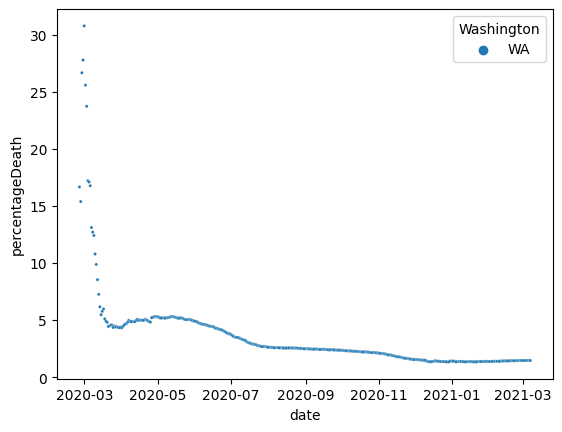

In [249]:
sns.scatterplot(data=df_new_washington, x="date", y="percentageDeath", s=5, hue="state")
plt.legend(title='Washington', loc='best')

Una vez más el comportamiento en Washington es diferente respecto a los dos estados anteriores. Los primeros meses observamos porcentajes muy altos de muertes.

Investigando un poco, hemos encontrado que: *"El 21 de enero, los Centros para el Control y la Prevención de Enfermedades (CDC) confirmaron el primer caso de Estados Unidos, en un hombre de 35 años que había regresado de Wuhan (China), aterrizando en el Aeropuerto Internacional de Seattle-Tacoma (WASHINGTON) el 15 de enero, sin ningún síntoma."*

**Teniendo en cuenta que la pandemia inició en este estado, podría tener sentido que los porcentajes de muerte en los primeros meses hayn sido tan altos.**